In [1]:
conda install pandas

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install numpy

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
conda install matplotlib

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
import warnings
%matplotlib inline

warnings.filterwarnings("ignore")

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle




In [7]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1. Load in the data. The target column should be considered as whether a patient will develop heart disease or not.

In [8]:
X_df = df.drop("target", axis=1)
X_df.shape

(303, 13)

In [9]:
y_df = df["target"]
y_df.shape

(303,)

2. Explore the data. Notice all columns are numerical. Therefore separate the continuous from the discrete features.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [13]:
df.shape

(303, 14)

In [14]:
numerical_continuous = []
for column in df.columns:
    if df[column].dtypes != "object":
        if df[column].nunique() >= 10:
            numerical_continuous.append(column)
numerical_continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
numerical_discreet = []
for column in df.columns:
    if df[column].dtypes != "object":
        if df[column].nunique() < 10:
            numerical_discreet.append(column)
numerical_discreet

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

3. Identify any presence of outliers in the continuous features and resolve them using the IQR method.

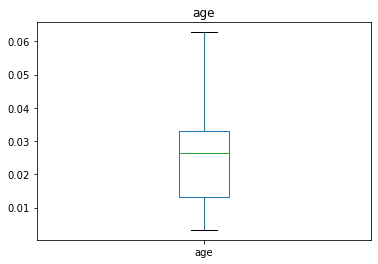

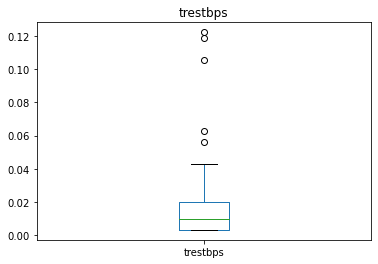

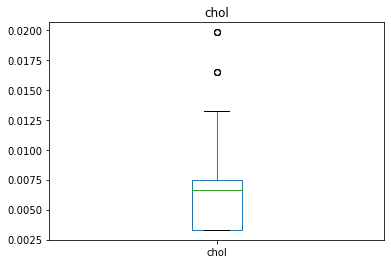

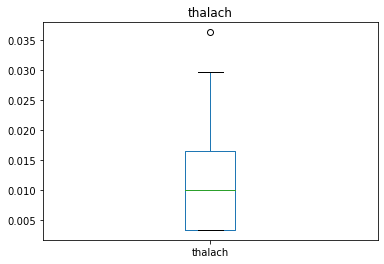

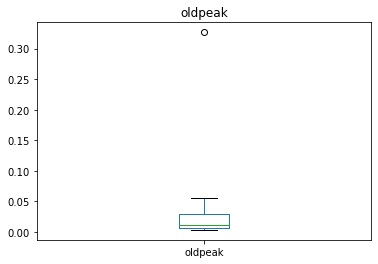

In [16]:
for column in numerical_continuous:
    (df[column].value_counts()/df.shape[0]).plot(kind = "box")
    plt.title(column)
    plt.show()

In [26]:
def remove_outlier(df, numerical_continuous):
    q1 = df[numerical_continuous].quantile(0.25)
    q3 = df[numerical_continuous].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5 * iqr
    fence_high = q3+1.5 * iqr
    df = df.loc[(df[numerical_continuous] > fence_low) & (df[numerical_continuous] < fence_high)]
    return df
    re_dat = remove_outlier(stepframe, stepframe.columns)

In [38]:
for column in numerical_continuous:
    lower, upper = remove_outlier(df[column])
    df = df.loc[(df[column] > lower) & (df[column] < upper)]

TypeError: remove_outlier() missing 1 required positional argument: 'numerical_continuous'

4. Binned the continuous column values apart from the column ‘oldpeak’.

In [39]:
le = LabelEncoder()
for column in numerical_continuous[:-1]: 
    df[column] = pd.qcut(df[column], q = [0, 0.25, 0.50, 0.75, 1])
    df[column] = le.fit_transform(df[column])

In [40]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,3,1,3,3,1,1,0,1,0,2.3,0,0,1,1
1,0,1,2,1,2,0,1,3,0,3.5,0,0,2,1
2,0,0,1,1,0,0,0,3,0,1.4,2,0,2,1
3,2,1,1,0,1,0,1,3,0,0.8,2,0,2,1
4,2,0,0,0,3,0,1,2,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2,0,0,2,2,0,1,0,1,0.2,1,0,3,0
299,0,1,3,0,2,0,1,0,0,1.2,1,0,3,0
300,3,1,0,3,0,1,1,1,0,3.4,1,2,3,0
301,2,1,0,1,0,0,1,0,1,1.2,1,1,3,0


5.Separate the features from the labels and use the most appropriate feature selection technique(s).

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
feature_sel_df = df.drop(["target"], axis = 1)
feature_sel_df[numerical_continuous] = feature_sel_df[numerical_continuous]
selector = SelectKBest(score_func=chi2, k=3)
selected_df = selector.fit_transform(feature_sel_df, df["target"])
selected_df

array([[3. , 2.3, 0. ],
       [2. , 3.5, 0. ],
       [1. , 1.4, 0. ],
       [1. , 0.8, 0. ],
       [0. , 0.6, 0. ],
       [0. , 0.4, 0. ],
       [1. , 1.3, 0. ],
       [1. , 0. , 0. ],
       [2. , 0.5, 0. ],
       [2. , 1.6, 0. ],
       [0. , 1.2, 0. ],
       [2. , 0.2, 0. ],
       [1. , 0.6, 0. ],
       [3. , 1.8, 0. ],
       [3. , 1. , 0. ],
       [2. , 1.6, 0. ],
       [2. , 0. , 0. ],
       [3. , 2.6, 0. ],
       [0. , 1.5, 0. ],
       [3. , 1.8, 2. ],
       [0. , 0.5, 0. ],
       [2. , 0.4, 0. ],
       [0. , 0. , 0. ],
       [2. , 1. , 0. ],
       [3. , 1.4, 0. ],
       [1. , 0.4, 2. ],
       [2. , 1.6, 0. ],
       [2. , 0.6, 0. ],
       [2. , 0.8, 1. ],
       [2. , 1.2, 0. ],
       [1. , 0. , 1. ],
       [0. , 0.4, 0. ],
       [1. , 0. , 0. ],
       [2. , 0.5, 1. ],
       [3. , 1.4, 1. ],
       [2. , 1.4, 0. ],
       [2. , 0. , 0. ],
       [2. , 1.6, 0. ],
       [2. , 0.8, 0. ],
       [2. , 0.8, 0. ],
       [2. , 1.5, 1. ],
       [1. , 0.2

6. Slice the data and scale the features.

In [46]:
scaled_df = df[[numerical_continuous]]
print("mean:", scaled_df[numerical_continuous].mean())
print("standard deviation:", scaled_df[numerical_continuous].std())

KeyError: "None of [Index([('age', 'trestbps', 'chol', 'thalach', 'oldpeak')], dtype='object')] are in the [columns]"

7. Identify the data if the data is balanced. If not, sample the data using the most appropriate method keeping the size of the data in mind.

In [63]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X, y)
from sklearn.metrics import roc_curve
y_prob = clf.predict_proba (X_test)
y_probs = y_probs[:,1]
Fpr, tpr, thresholds = roc_curve(y_test,  y_prob)
Fpr
import matplotlib.pyplot as plt
def plot_roc_curve(Fpr, tpr)



SyntaxError: invalid syntax (<ipython-input-63-6eef9d6e0b86>, line 9)

8. Using at least 4 classification methods, identify the best machine learning model using their training and testing accuracy scores.

In [61]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

NameError: name 'x' is not defined

In [54]:
log_reg = LogisticRegression(random_state = 0)
svm_clf = SVC(random_state = 0)
knn_clf = KNeighborsClassifier()
rf_clf = RandomForestClassifier(random_state = 0)

models = {'LogisticRegression': log_reg, 'SVC': svm_clf, 'KNeighborsClassifier': knn_clf, 'RandomForestClassifier': rf_clf}

In [55]:
def model_training_testing(models):
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_predict_trian = model.predict(X_train)
        y_predict_test = model.predict(X_test)
        print(f'{model_name} Training Accuracy:', accuracy_score(y_train, np.round(y_predict_trian)))
        print(f'{model_name} Testing Accuracy:', accuracy_score(y_test, np.round(y_predict_test)))
        print('\n')

In [56]:
model_training_testing(models)

NameError: name 'X_train' is not defined

9. Hyper parameter tune the best model using grid search to identify the best performing model.

In [57]:
params = {'n_estimators': np.arange(10, 100, 10), 'random_state': [0], 'n_jobs': [1, -1]} 
grid_search = GridSearchCV(RandomForestClassifier(), params, n_jobs = -1, cv = 5)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_

NameError: name 'X_train' is not defined

10. Redefine the model instance based on the grid search results, train it and evaluate it using:
a. A classification report.
b. A visual representation and well labelled confusion matrix.
c. AUC score. (Explain the score in a markdown cell.)
d. ROC curve.

In [66]:
def model_evaluation(model, X, y, model_name):
    y_predict = model.predict(X)
    print(f'Model: {model_name} \n \n Classification Report: {classification_report(y, y_predict)}')

    cnf_matrix = confusion_matrix(y, y_predict)
    
    class_names = [0, 1]
    tick_marks = np.arange(len(class_names))
    plt.figure(figsize = (9, 7))

    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')

    plt.title(f'{model_name} Confusion Matrix', y = 1.1, fontsize = 22)
    plt.ylabel('Actual Label', fontsize = 15)
    plt.xlabel('Predicted Label', fontsize = 15)

In [67]:
model_evaluation(rf_clf_tuned, X_test, y_test, model_name = 'Random Forest Classifier Tuned')

NameError: name 'rf_clf_tuned' is not defined

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = rf_clf_tuned.predict_proba(X_test)[:, 1]
print(f'Area Under the Curve Score: {roc_auc_score(y_test, y_pred_prob)}')

NameError: name 'rf_clf_tuned' is not defined

In [70]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

df_roc = pd.DataFrame([fpr, tpr]).T
df_roc.columns = ['False Positive Ratio', 'True Positive Ratio']

import plotly.express as px

fig = px.line(df_roc, x = 'False Positive Ratio', y = 'True Positive Ratio')
fig.update_layout(title = dict(text = "ROC Curve.", y = 0.95, x = 0.5, 
                               xanchor = 'center', yanchor = 'top', font = dict(size = 20)))

NameError: name 'y_test' is not defined

11. Based on the results on the ROC curve, which threshold would be ideal given the nature of the data? (Explain in a markdown cell.)

12. Save the model as ‘classification_model’.

In [71]:
pickle.dump(rf_clf_tuned, open("classification_model.pkl", "wb"))

NameError: name 'rf_clf_tuned' is not defined